In [21]:
%matplotlib inline
#load packages
import numpy as np
from fluid_sphere import *
import time
import pandas as pd
import seaborn as sns

In [22]:
#Define variables
c_w = 1500 
f = 200000
#c_b = 1.0025*1500
#c_b = 0.00044*1500
Range = 1
#Radius = 0.01
Radius = 0.003
Rho_w = 1026
#Rho_b = 1.0025 * Rho_w
#Rho_b = 0.001 * Rho_w
Pst0=101325
g=9.8
depth=20
rhoG0 = 0.66
sigma=0.0740;#surface tesion
Pst=Pst0+Rho_w*g*depth #static pressure (Pa)
Rho_b = rhoG0*(1+2*sigma/(Pst*Radius))*(1+0.1*Radius)
Theta = 1.571
gamma=1.299 
c_b=math.sqrt(gamma*Pst/Rho_b)
c_b,math.sqrt(gamma*Pst0/rhoG0)

(771.3260979109434, 446.5714083181689)

In [23]:
#Anderson (1950)
#get TS
TS = fluid_sphere(f=f,Radius=Radius, Range=Range,Rho_w=Rho_w,Rho_b=Rho_b,Theta=Theta,c_w=c_w,c_b=c_b)
print("TS for the sphere is %.2f dB"%TS)

TS for the sphere is -55.93 dB


In [24]:
freqs = np.arange(1,300,0.1)*1000
start = time.perf_counter()
TS = [fluid_sphere(f=x,Radius=Radius, Range=Range,Rho_w=Rho_w,Rho_b=Rho_b,Theta=Theta,c_w=c_w,c_b=c_b) for x in freqs]
end = time.perf_counter()
tel_0 = end - start
print("Evaluating the TS took %.2f seconds"%tel_0)

Evaluating the TS took 3.93 seconds


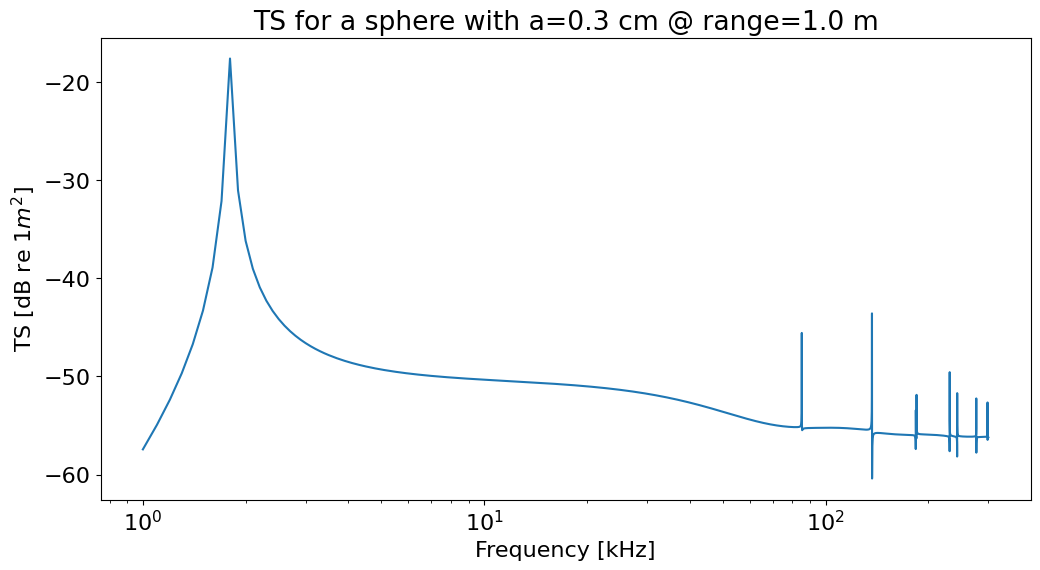

In [25]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(freqs/1000, TS)
plt.xlabel("Frequency [kHz]")
plt.ylabel("TS [dB re 1$m^2$]")
plt.title("TS for a sphere with a=%.1f cm @ range=%.1f m"%(Radius*100,Range))
ax.set_xscale('log')
plt.show()

In [26]:
#Thuraisingham

In [27]:
ethas=0.0014#shear viscosity
rhow=1026
cp=2191 #specifi9c heat capacity
gamma=1.299 
kcond=0.306 #thermal conductivity
rhoG0=0.66
Pst0=101325
g=9.8
#rad=np.arange(0.002,0.004,0.000001)
#rad=np.arange(0.00001,0.01,0.000001)
#rad=np.linspace(BSD[0][0]/2/1000, BSD[0][-1]/2/1000, num=200)
rad=0.003;
sigma=0.0740;#surface tesion
#freq=260000
freq=freqs
# freq=150000;
Pst=Pst0+rhow*g*depth #static pressure (Pa)
r_fix=math.sqrt(3*gamma*Pst/rhow)/(2*math.pi*freq)
cw=1500
k=2*math.pi*freq/cw;
pv=872 # vapour pressure [Pa] at 10?C
omega=2*math.pi*freq
Mm=0.016 #molar mass CH4 [kg/mol]
R=8.31 #gas constant [m2 kg s?2 K?1 mol?1]
T=273+10 #temperature (kelvin)

In [28]:
Pgas=Pst0+rhow*g*depth+2*sigma/rad-pv #gas pressure inside the bubble
rhoG=rhoG0*(1+2*sigma/(Pst*rad))*(1+0.1*depth)
Da=kcond/(rhoG*cp) #Thermal diffusivity gas m2/s
Xhi=np.sqrt(2*omega*rad/Da)
GammaPolyIn=gamma/(1-((1+1j)*Xhi/2/(np.tanh((1+1j)*Xhi/2))-1)*6j*(gamma-1)/(Xhi*Xhi))
OMG_complex2=3/(rhow*rad*rad)*(GammaPolyIn*Pgas-2*sigma/(3*rad))
w0=np.sqrt(OMG_complex2.real)
beta_th=OMG_complex2.imag/(2*omega)
beta_vis=2*ethas/(rhow*rad*rad)
beta0=beta_th+beta_vis
Thur_factor=(np.sin(k*rad)/(k*rad))*(np.sin(k*rad)/(k*rad))/(1+(k*rad)*(k*rad)) #Thuraisingham factor
BX=rad**2/((w0*w0/(omega*omega)-1-2*beta0*k*rad/omega)*\
(w0*w0/(omega*omega)-1-2*beta0*k*rad/omega)+\
(2*beta0/omega+w0*w0*k*rad/(omega*omega))*\
(2*beta0/omega+w0*w0*k*rad/(omega*omega)))*Thur_factor

TStheo=10*np.log10(BX)

In [29]:
from scipy.optimize import curve_fit
def objective(x, a, b):
    return a * x + b
popt, _ = curve_fit(objective, rad, TStheo)
a, b = popt

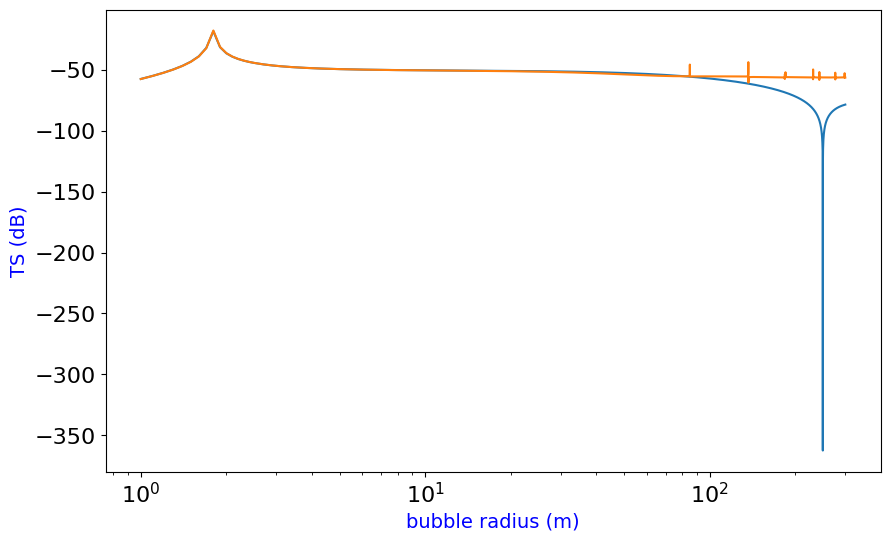

In [30]:
#plot theoretical backscattering
plt.close('BX')
fig = plt.figure('BX',figsize=(10, 6))
ax = fig.subplots()
ax.clear()
ax.plot(freqs/1000,TStheo)
ax.plot(freqs/1000,TS)
ax.set_ylabel("TS (dB)",color="blue",fontsize=14)
ax.set_xlabel("bubble radius (m)",color="blue",fontsize=14)

#x_line = np.arange(min(rad), max(rad), 0.0001)
# calculate the output for the range
#y_line = objective(x_line, a, b)
# create a line plot for the mapping function
#ax.plot(x_line, y_line, '--', color='red')

ax.set_xscale('log')
plt.show()